In [13]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import sys; sys.path.insert(0, '.')
#img_encoder = importlib.import_module ('.basics.models.image_encoder', '.basics')
#image_encoder = img_encoder.ImageEncoderViT
from basics.models.image_encoder import ImageEncoderViT
from PIL import Image
import torch
import cv2


In [14]:
from torchvision.transforms.functional import resize, to_pil_image

In [16]:
def get_preprocess_shape(oldh: int, oldw: int, long_side_length: int):
        """
        Compute the output size given input size and target long side length.
        """
        scale = long_side_length * 1.0 / max(oldh, oldw)
        newh, neww = oldh * scale, oldw * scale
        neww = int(neww + 0.5)
        newh = int(newh + 0.5)
        return (newh, neww)

In [17]:
image_encoder =  ImageEncoderViT(in_chans=3)

#loading weights
SAM_weights = torch.load("/home/bbahaduri/sryolo/codes/models/sam_vit_b_01ec64.pth")
vit_bb = {}
for key in SAM_weights.keys():
    if key.startswith("image_encoder"): # and not key.startswith("image_encoder.patch_embed") and not key.startswith("image_encoder.pos_embed"):
        print(key)
        vit_bb[key] = SAM_weights[key]
image_encoder.load_state_dict(vit_bb, strict=False)
print("related weights loaded from SAM")

image_encoder.neck.0.weight
image_encoder.neck.1.weight
image_encoder.neck.1.bias
image_encoder.neck.2.weight
image_encoder.neck.3.weight
image_encoder.neck.3.bias
image_encoder.patch_embed.proj.weight
image_encoder.patch_embed.proj.bias
image_encoder.blocks.0.norm1.weight
image_encoder.blocks.0.norm1.bias
image_encoder.blocks.0.attn.rel_pos_h
image_encoder.blocks.0.attn.rel_pos_w
image_encoder.blocks.0.attn.qkv.weight
image_encoder.blocks.0.attn.qkv.bias
image_encoder.blocks.0.attn.proj.weight
image_encoder.blocks.0.attn.proj.bias
image_encoder.blocks.0.norm2.weight
image_encoder.blocks.0.norm2.bias
image_encoder.blocks.0.mlp.lin1.weight
image_encoder.blocks.0.mlp.lin1.bias
image_encoder.blocks.0.mlp.lin2.weight
image_encoder.blocks.0.mlp.lin2.bias
image_encoder.blocks.1.norm1.weight
image_encoder.blocks.1.norm1.bias
image_encoder.blocks.1.attn.rel_pos_h
image_encoder.blocks.1.attn.rel_pos_w
image_encoder.blocks.1.attn.qkv.weight
image_encoder.blocks.1.attn.qkv.bias
image_encoder.bloc

In [18]:
image = cv2.imread('/home/bbahaduri/sryolo/sryolo_data/VEDAIdataset/VEDAI/images/00000001_co.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#target_size = get_preprocess_shape(image.shape[0], image.shape[1], 512)

input_img = np.array(image)        #resize(to_pil_image(image), target_size)

In [19]:
input_image_torch = torch.as_tensor(input_img)

In [21]:
pixel_mean= [123.675, 116.28, 103.53]
pixel_std= [58.395, 57.12, 57.375]

x = (input_image_torch - torch.tensor(pixel_mean)) / torch.tensor(pixel_std)

#features = image_encoder(x)

RuntimeError: Given groups=1, weight of size [768, 3, 16, 16], expected input[1, 512, 512, 3] to have 3 channels, but got 512 channels instead

In [23]:
x = x.permute(2, 0, 1).contiguous()[None, :, :, :]

In [24]:
print(x.shape)

torch.Size([1, 3, 512, 512])


In [25]:
features = image_encoder(x)

In [26]:
print(features.shape[-1], features.shape[1])

32 256


In [28]:
print(features.shape)

torch.Size([1, 256, 32, 32])


In [29]:
print(features.requires_grad)

True


In [30]:
features_d = features.detach()
features_d.requires_grad = False

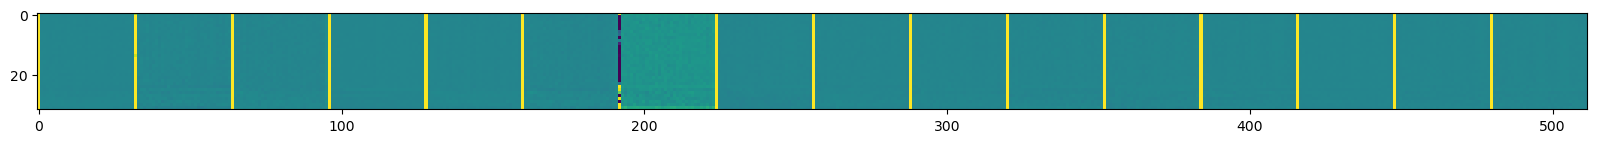

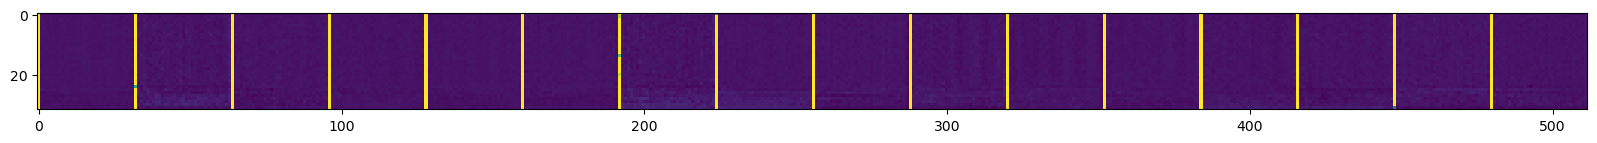

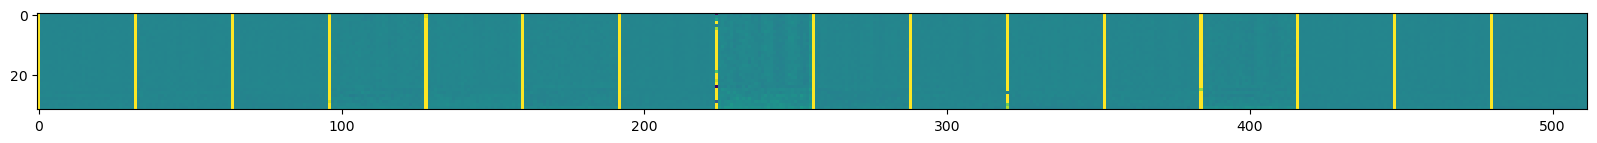

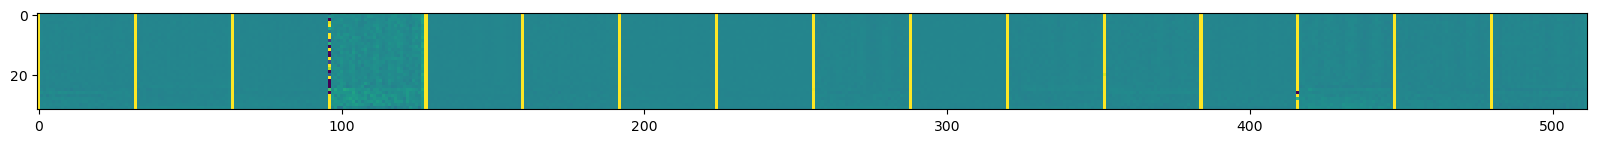

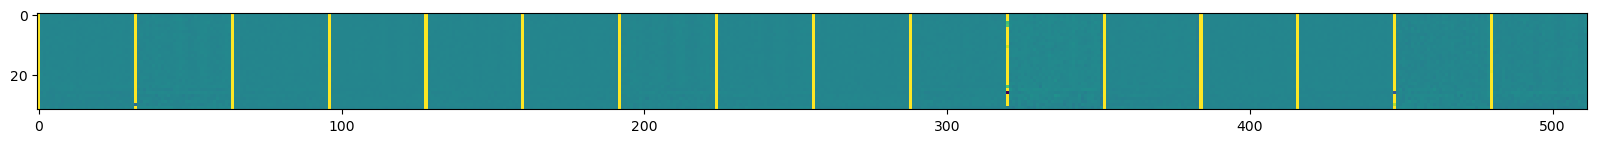

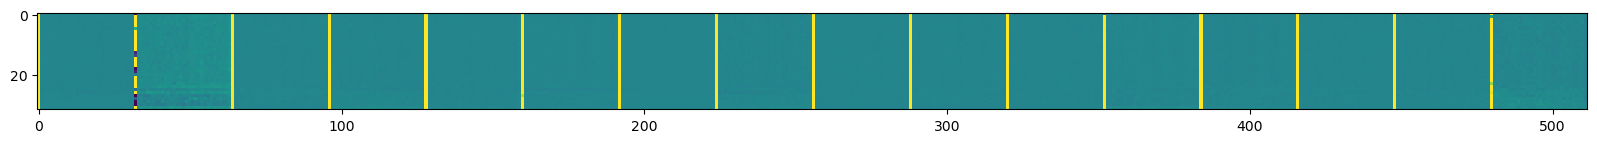

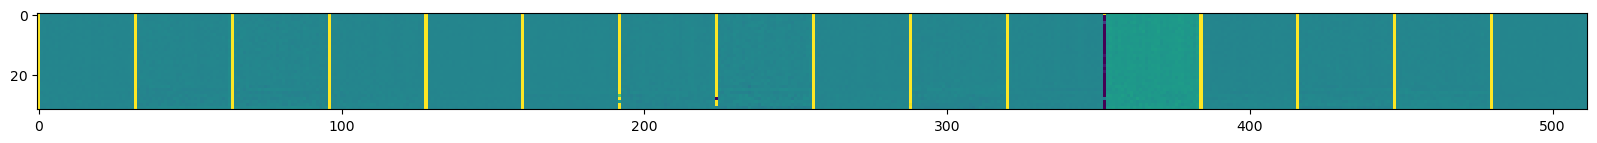

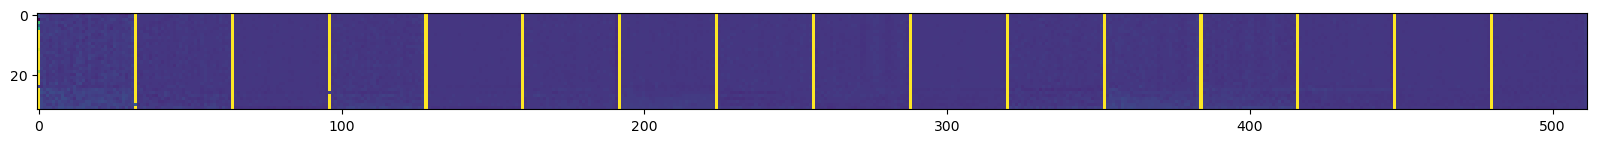

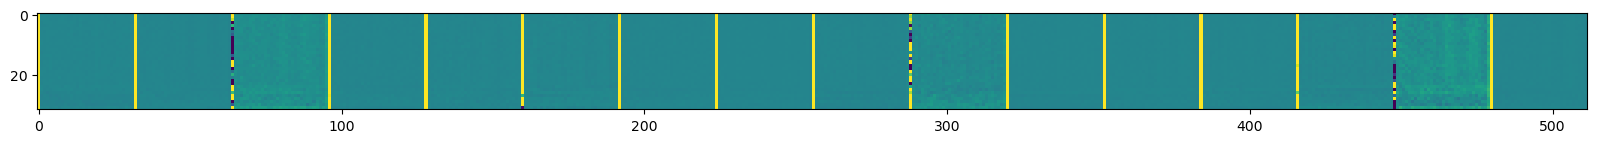

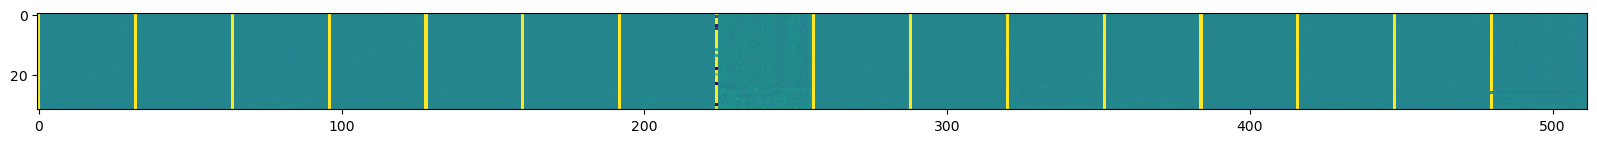

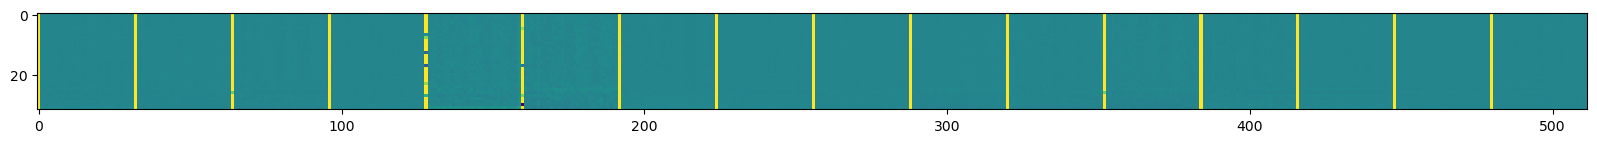

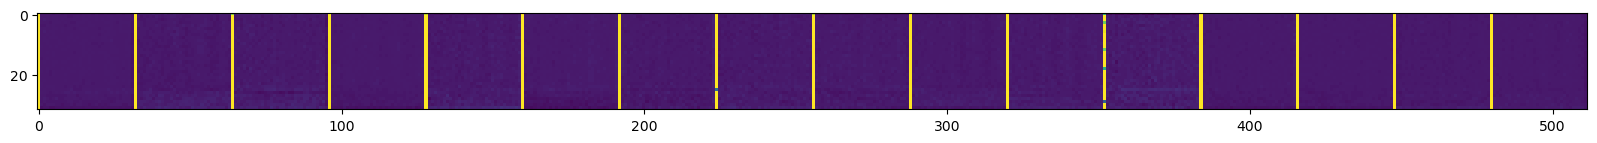

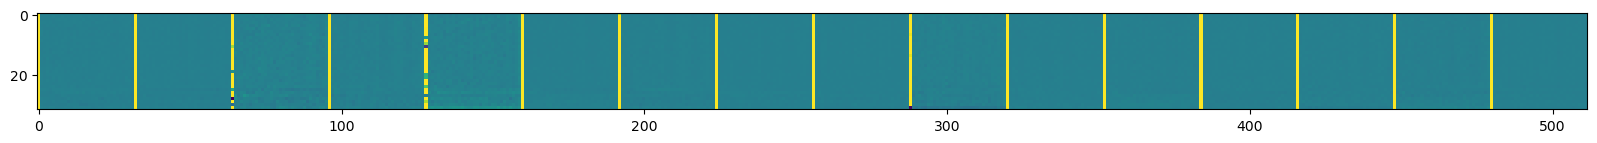

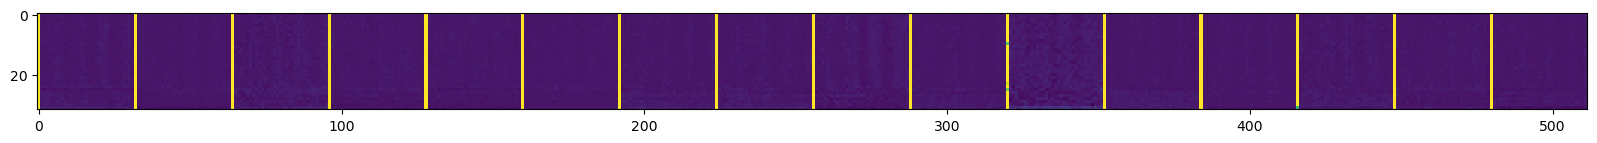

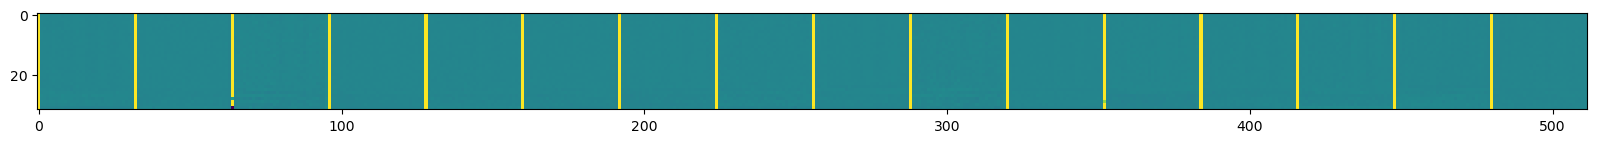

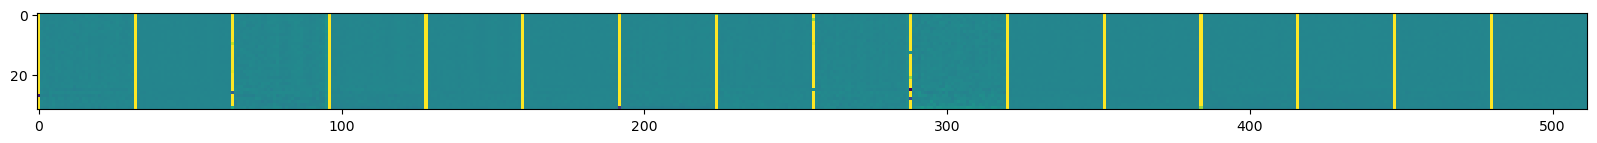

In [45]:
n_features = features_d.shape[1]  # number of features in the feature map
size       = features_d.shape[-1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
display_grid = np.zeros((size,  size *16))# n_features
    
    # Postprocess the feature to be visually palatable
for j in range (1, 17):
    for i in range((j-1)*16, j*16):    #n_features
        x  = features_d[0, i, :, :].numpy()
    #print(x.shape)
        x -= x.mean()
        x /= x.std ()
        x *=  64
        x += 128
        x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
        display_grid[:, i%16 * size : (i%16 + 1) * size] = x
# Display the grid
    scale = 20. / 16             #n_features
    plt.figure( figsize=(scale * 16, scale) )       #n_features
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [38]:
print(display_grid.shape)
print(n_features)

(32, 8192)
256
